<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/Kernel_Trick_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

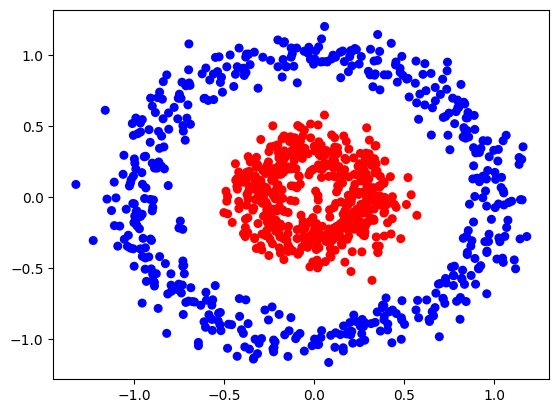

In [101]:
from sklearn.datasets import make_circles
X, y = make_circles(1000, factor=.3, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [103]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.63

In [105]:
# Create a colormap for binary classification (class 0 → blue, class 1 → red)
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    # Store feature matrix X and target labels y
    X_set, y_set = X, y

    # Create a dense grid of points that covers the entire feature space
    # This grid will be used to evaluate the classifier at every point
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1,
                  stop=X_set[:, 0].max() + 1,
                  step=0.01),
        np.arange(start=X_set[:, 1].min() - 1,
                  stop=X_set[:, 1].max() + 1,
                  step=0.01)
    )

    # Predict the class label for every point in the grid
    # The grid points are reshaped to match the contour plot shape
    plt.contourf(
        X1, X2,
        clf.predict(
            np.array([X1.ravel(), X2.ravel()]).T
        ).reshape(X1.shape),
        alpha=0.75,               # Transparency of decision regions
        cmap=zero_one_colourmap   # Colormap for different classes
    )

    # Set plot limits
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot the actual data points on top of the decision regions
    # Each class is plotted with a different color
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],   # X-axis values for class j
            X_set[y_set == j, 1],   # Y-axis values for class j
            c=(zero_one_colourmap)(i),
            label=j
        )

    # Add plot title and axis labels
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Display legend showing class labels
    plt.legend()

    # Display the plot
    return plt.show()


/tmp/ipython-input-3484349746.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


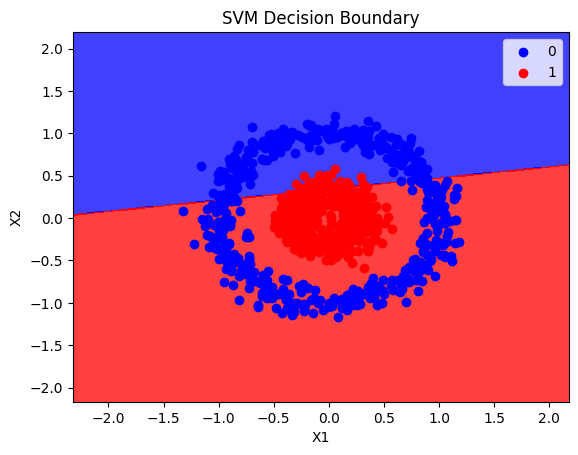

In [106]:
plot_decision_boundary(X, y, classifier)

In [107]:
def plot_3d_plot(X, y):
  # rbf transformation
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

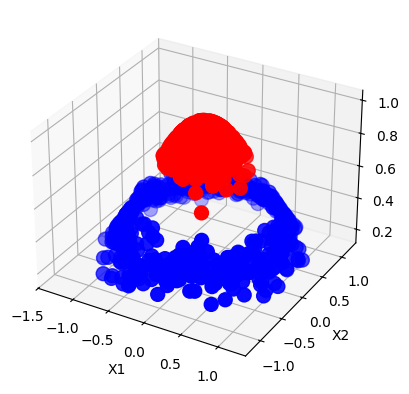

In [108]:
plot_3d_plot(X,y)

In [109]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [110]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3484349746.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


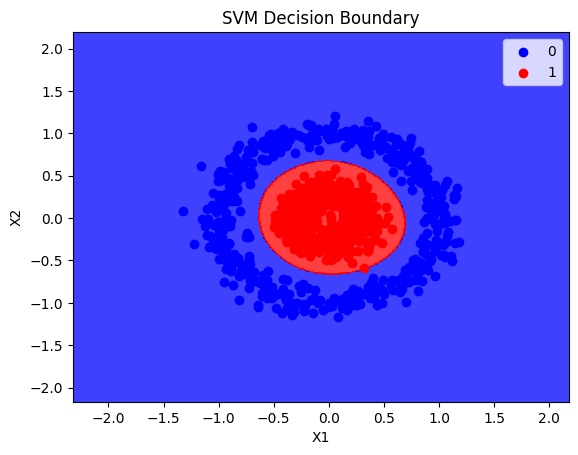

In [111]:
plot_decision_boundary(X, y, rbf_classifier)

In [112]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipython-input-3484349746.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


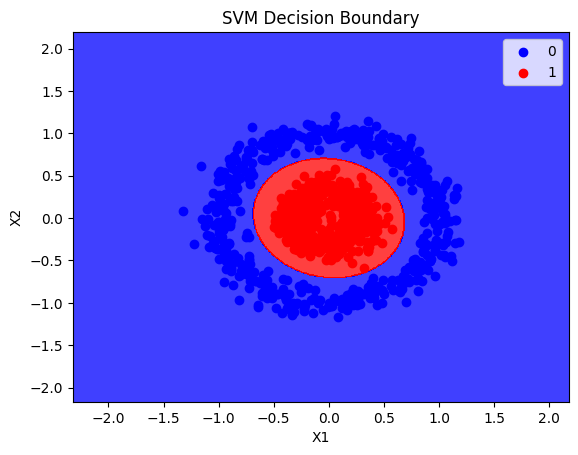

In [114]:
plot_decision_boundary(X, y, poly_classifier)

In [115]:
X

array([[-0.12945466,  0.19663125],
       [ 0.11320813,  0.28892369],
       [-0.52737629,  0.98606529],
       ...,
       [-0.4285311 ,  0.07305292],
       [-0.21807143,  0.03432726],
       [ 0.48766119, -0.86753985]])

In [116]:
np.exp(-(X**2)).sum(1)

array([1.94545519, 1.90717803, 1.13540438, 1.21498377, 1.96829091,
       1.2335118 , 1.92465818, 1.24590016, 1.40145098, 1.79415084,
       1.78560266, 1.91570593, 1.91547781, 1.96365586, 1.92003448,
       1.14495437, 1.86826779, 1.90241456, 1.2316412 , 1.20701333,
       1.93439184, 1.96565175, 1.78214749, 1.81057639, 1.90799611,
       1.92512325, 1.92398909, 1.97809016, 1.15167093, 1.1256507 ,
       1.81618552, 1.22348464, 1.20553282, 1.93985248, 1.91429782,
       1.32559029, 1.81336436, 1.86698349, 1.51605165, 1.13952624,
       1.29992166, 1.99896095, 1.34016929, 1.87982316, 1.32159461,
       0.9502642 , 1.29400584, 1.85302678, 1.94180007, 1.34221083,
       1.29997244, 1.2780831 , 1.34317573, 1.18596163, 1.17240691,
       1.86789898, 1.34673985, 1.32871029, 1.21164171, 1.27438578,
       1.94198027, 1.17278272, 1.90930845, 1.40607292, 1.82715171,
       1.2543095 , 1.88100704, 1.86714966, 1.88789666, 1.92153281,
       1.95005995, 1.88622349, 1.88495401, 1.22347335, 1.98425

In [117]:
X_new=np.exp(-(X**2))

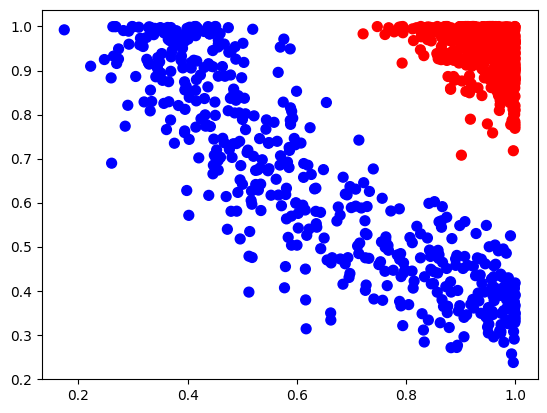

In [118]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')